Temat: Jak kształtuje się nowa rzeczywistość w czasach pandemii.

Przedstawiają: Wiktoria Fimińska, Julia Grzegorzewska, Adam Kawałko, Adam Pędziwiatr

Wstęp: 4 marca 2020 pojawił się w Polsce pierwszy oficjalnie zarażony na Covid-Sars-2. Już tydzień później zostały zamknięte szkoły. Ceny akcji dramatycznie spadały w prawie wszystkich branżach. Pełno firm usługowych musiało całkowicie zamknąć działalność. Polacy zamknęli się w swoich domach i oswajali się z nową rzeczywistością.
Po ponad roku życia w tym globalnym eksperymencie, postanowiliśmy go zbadać. Naszą uwagę skupiliśmy na Polsce.
W tej prezentacji omówimy zmiany jakie zaobserwowaliśmy w kwestiach medycznych oraz jakość powietrza dla stacji przy ul. Korzeniowskiego we Wrocławiu.

In [4]:
using Plots
using DelimitedFiles
using DataFrames
using Statistics

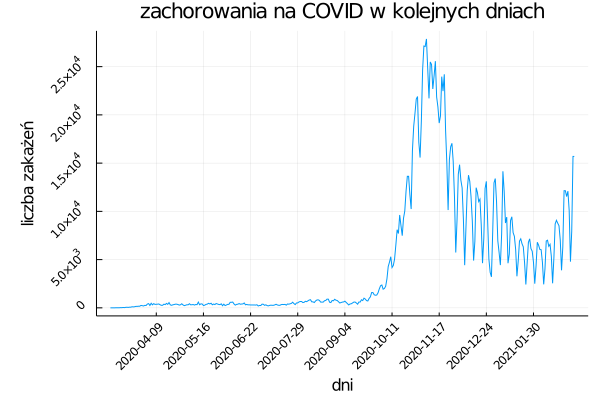

In [85]:
zarazenia=readdlm("dane_zarazen_COVID.txt") #wszystkie dni od 04.03.2020 do 03.03.2021
zarazenia_calosc=Float16.(zarazenia[2:end, 3])
plot(zarazenia[2:end, 1], 
    zarazenia_calosc, 
    rotation=45, 
    title="zachorowania na COVID w kolejnych dniach", 
    legend=false, 
    xlabel = "dni", 
    ylabel="liczba zakażeń")

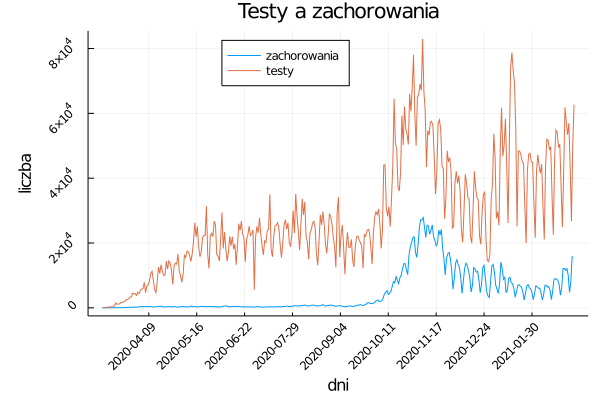

In [6]:
liczba_testow=readdlm("liczba-testów.txt")
plot(zarazenia[2:end, 1], 
    zarazenia_calosc, 
    rotation=45, 
    title="Testy a zachorowania", 
    label="zachorowania", 
    xlabel="dni", 
    ylabel="liczba",
    legend=:top)
plot!(liczba_testow, label="testy")

In [7]:
function srednia_kroczaca(dane::Array, kolumna::Int64, zakres_sredniej::Int64)
    dane2 = Vector{Any}(undef, size(dane)[1])
    dane2 = dane[1:size(dane)[1], kolumna]
    for i in 2+zakres_sredniej:size(dane)[1]-zakres_sredniej
        suma = dane[i, kolumna]
        for j in 1:zakres_sredniej
            suma += dane[i+j, kolumna] + dane[i-j, kolumna]
        end
        dane2[i] = suma/(2*zakres_sredniej + 1)
    end
    return dane2
end

srednia_kroczaca (generic function with 1 method)

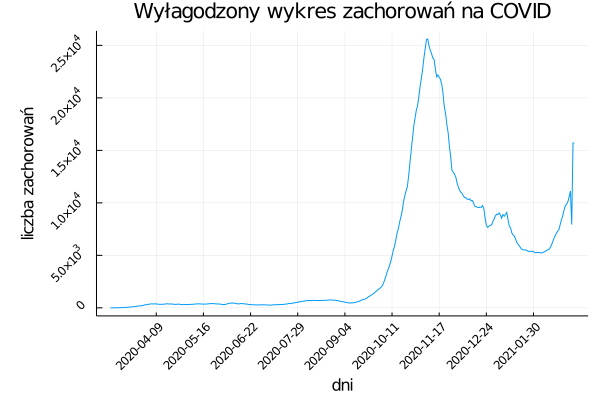

In [8]:
zarazeni_lagodne = srednia_kroczaca(Float64.(zarazenia[2:end, 3]), 1, 3)
plot(zarazenia[2:end, 1],
    zarazeni_lagodne,
    rotation=45, 
    title="Wyłagodzony wykres zachorowań na COVID", 
    legend=false, 
    xlabel = "dni", 
    ylabel="liczba zachorowań")

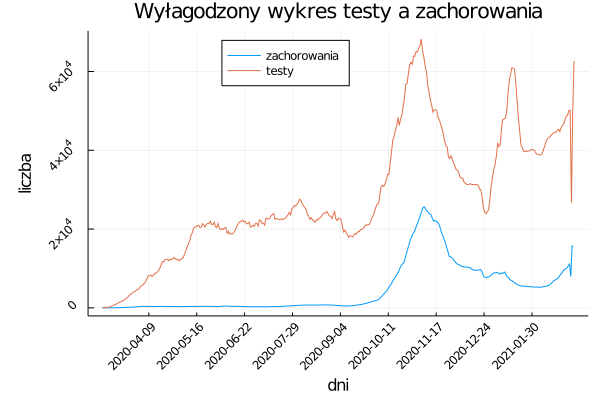

In [10]:
testy_lagodne = srednia_kroczaca(liczba_testow,1,3)
plot(zarazenia[2:end, 1],
    zarazeni_lagodne,
    rotation=45, 
    title="Wyłagodzony wykres testy a zachorowania", 
    legend=:top, 
    xlabel = "dni", 
    ylabel="liczba",
    label = "zachorowania")
plot!(testy_lagodne,label="testy")

In [83]:
cor(Float64.(zarazenia[2:end, 3]), Float64.(liczba_testow))

1×1 LinearAlgebra.Transpose{Float64,Array{Float64,1}}:
 0.775649737219961

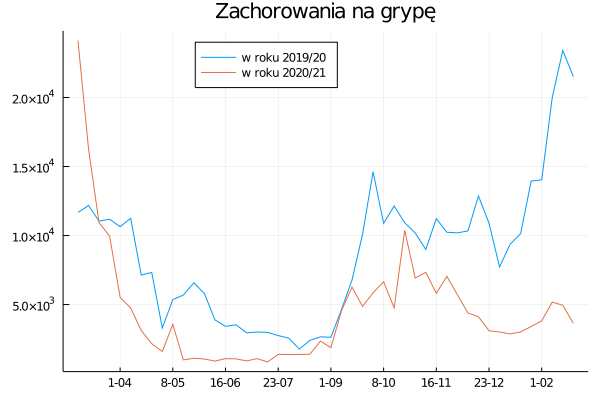

In [57]:
daty_1tyg = readdlm("daty_chorób_1tyg.txt")
grypa_prze=readdlm("grypa_przed.txt") #daty bez roku
grypa_covi=readdlm("grypa_covid.txt")
grypa_przed=Float16.(grypa_prze[:])
grypa_covid=Float16.(grypa_covi[:])
plot(daty_1tyg[1:end,1],grypa_przed,label="w roku 2019/20", title="Zachorowania na grypę", legend=:top)
plot!(daty_1tyg[1:end,1],grypa_covid, label="w roku 2020/21")

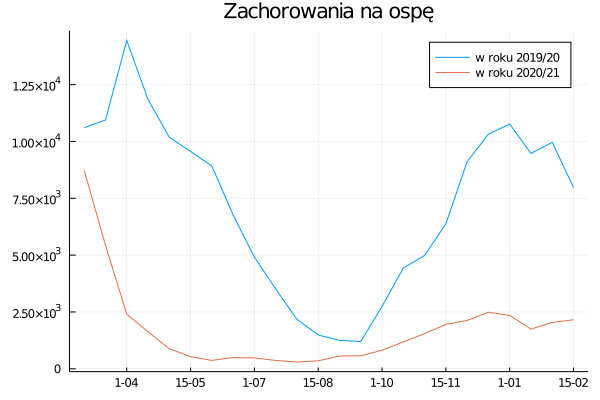

In [41]:
daty_2tyg = readdlm("daty_chorób.txt")
ospa_prze=readdlm("ospa_przed.txt")
ospa_covi=readdlm("ospa_covid.txt")
ospa_przed=Float16.(ospa_prze)
ospa_covid=Float16.(ospa_covi)
plot(daty_2tyg[1:end,1],ospa_przed, label="w roku 2019/20", title="Zachorowania na ospę")
plot!(daty_2tyg[1:end,1],ospa_covid, label="w roku 2020/21")

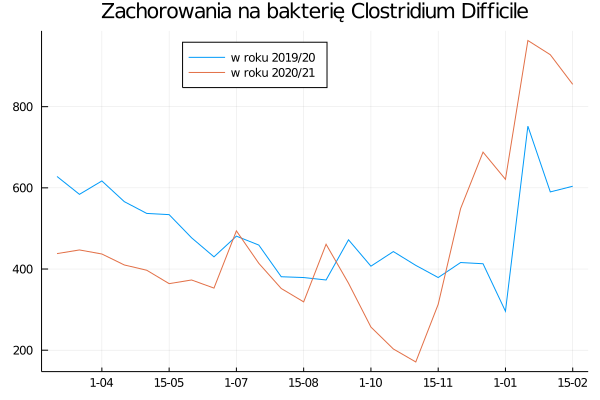

In [42]:
bakteria_prze=readdlm("bakteria_przed.txt")
bakteria_covi=readdlm("bakteria_COVID.txt")
bakteria_przed=Float16.(bakteria_prze)
bakteria_covid=Float16.(bakteria_covi)
plot(daty_2tyg[1:end,1],bakteria_przed,label="w roku 2019/20", title="Zachorowania na bakterię Clostridium Difficile", legend=:top)
plot!(daty_2tyg[1:end,1],bakteria_covid, label="w roku 2020/21")

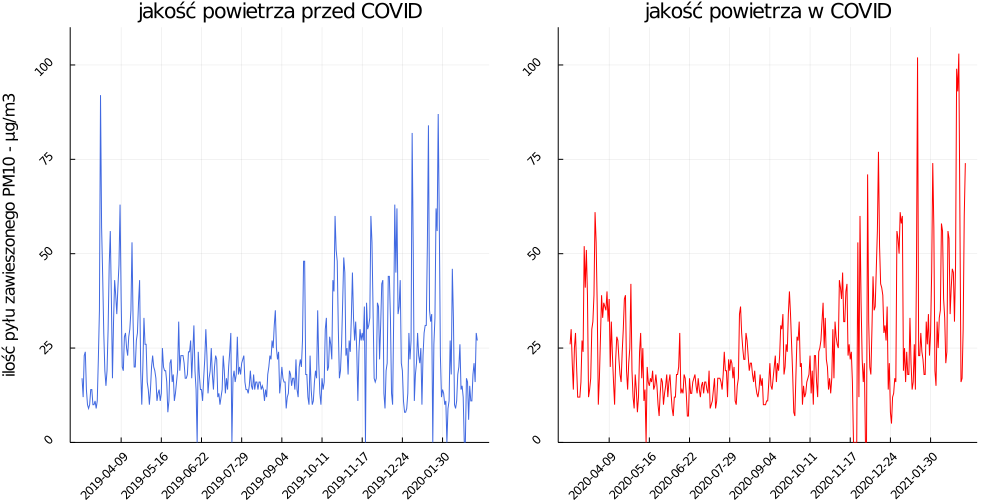

In [78]:
#using MosaicViews, TestImages
powietrze_covid=readdlm("powietrze_covid.txt")
powietrze_przed=readdlm("powietrze_przed.txt")
powiet_przed=Float16.(powietrze_przed[2:end, 2])
powiet_covid=Float16.(powietrze_covid[2:end, 2])

przed_cov=plot(powietrze_przed[2:end,1], 
    powiet_przed, 
    rotation=45 ,
    legend=false, 
    title="jakość powietrza przed COVID", 
    color = "royal blue", 
    ylabel="ilość pyłu zawieszonego PM10 - µg/m3")

w_cov=plot(zarazenia[2:end, 1], 
    powiet_covid, 
    rotation=45, 
    legend=false, 
    title="jakość powietrza w COVID",
    color="red",
    ylims = (0,100))

plot(przed_cov,w_cov,size=(989,500), legend = false, ylims = (0,110))

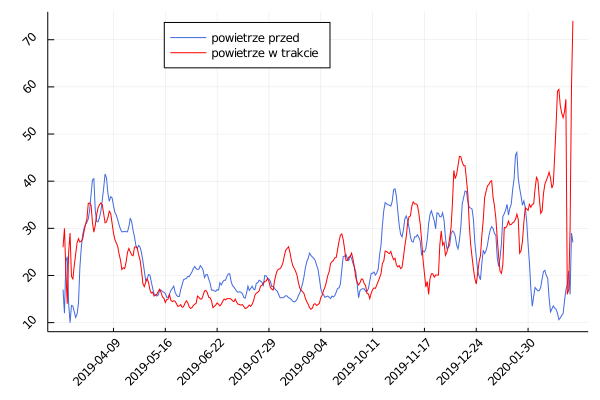

In [79]:
lagod_prz=srednia_kroczaca(powiet_przed,1,5)
lagod_po = srednia_kroczaca(powiet_covid,1,5)
plot(powietrze_przed[2:end,1], lagod_prz, rotation=45, label = "powietrze przed", color = "royal blue")
plot!(powietrze_przed[2:end,1], lagod_po, rotation=45, label = "powietrze w trakcie", legend=:top, color="red")

Docelowo chcemy mieć dni działania GPW, by móc lepiej analizować później sytuację na giełdzie.

In [ ]:
function zarazenia_GPW(wszystkie_dni::Array{}) #funkcja tworzy tablice z dni w które działa giełda papierów wartościowych
    CCC=readdlm("CCC_COVID.txt")
    dni_GPW = Array{Any,2}(undef, 252,3)
    dni_GPW[1,1:3] .= wszystkie_dni[1, 1:3]
    for i in 2:252
        j = 0
        while CCC[i,1] != wszystkie_dni[i+j,1]
            j += 1
        end
        dni_GPW[i,1:3] .= wszystkie_dni[i+j, 1:3]
    end
    return dni_GPW
end
zarazenia_w_dni_GPW = zarazenia_GPW(zarazenia)

Bibliografia:
- https://air.wroclaw.pios.gov.pl/dane-pomiarowe/manualne/stacja/12/parametry/1506-1450-1449-1451-1452-1453-1454-1455-1507-1509-1511-1448/miesieczny/01.2021?fbclid=IwAR3IpCjZ7gc9gTR7HDXKlNA5u4Nr2nC3_cGDmHNRcvSbVUdRSStK0fkM8lw
- https://pl.wikipedia.org/wiki/Pandemia_COVID-19_w_Polsce
- https://www.gov.pl/attachment/31c2294c-941b-4c94-8488-2cbb9249d6fe
- http://wwwold.pzh.gov.pl/oldpage/epimeld/index_p.html